In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import torch
import yaml
from celldreamer.paths import ROOT
from celldreamer.estimator.celldreamer_estimator import CellDreamerEstimator
from celldreamer.paths import DATA_DIR
from celldreamer.data.utils import Args

from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor, TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.utilities.model_summary import ModelSummary

In [2]:
cd $ROOT

/home/icb/alessandro.palma/environment/celldreamer


Load configuration 

In [3]:
config = yaml.safe_load(open(ROOT / "configs/scrnaseq/config_ddpm.yaml", 
                            "rb"))
args_pert = Args(config["args"]) 

Initialize estimator 

In [4]:
estimator = CellDreamerEstimator(args_pert)

Create the training folders...
Initialize data module...


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
wandb: WARNING `resume` will be ignored since W&B syncing is set to `offline`. Starting a new run with run id 6bq3e3xw.


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/alessandro.palma/miniconda3/envs/celldream ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Initialize feature embeddings...
Initialize model...
[1838, 256, 256, 1838]


In [5]:
estimator.generative_model

ConditionalGaussianDDPM(
  (denoising_model): MLPTimeStep(
    (net): Sequential(
      (0): MLPTimeEmbedCond(
        (time_embed_net): Sequential(
          (0): Linear(in_features=256, out_features=256, bias=True)
          (1): SELU()
          (2): Linear(in_features=256, out_features=256, bias=True)
        )
        (net): Sequential(
          (0): Linear(in_features=1838, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SELU()
        )
        (out_layer): Linear(in_features=256, out_features=256, bias=True)
      )
      (1): MLPTimeEmbedCond(
        (time_embed_net): Sequential(
          (0): Linear(in_features=256, out_features=256, bias=True)
          (1): SELU()
          (2): Linear(in_features=256, out_features=256, bias=True)
        )
        (net): Sequential(
          (0): Linear(in_features=256, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, mome

Train model

In [6]:
estimator.train()

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/alessandro.palma/miniconda3/envs/celldream ...
  rank_zero_warn(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /lustre/groups/ml01/workspace/alessandro.palma/celldreamer/try_experiment_pbmc/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type        | Params
------------------------------------------------
0 | denoising_model | MLPTimeStep | 8.6 M 
1 | mse             | MSELoss     | 0     
----

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

**Examine the MLP parameters**

In [7]:
estimator.generative_model.denoising_model.model

AttributeError: 'MLPTimeStep' object has no attribute 'model'

In [8]:
params = list(estimator.generative_model.denoising_model.model.net[0].parameters())[0].cpu().detach().numpy()

AttributeError: 'MLPTimeStep' object has no attribute 'model'

In [10]:
params[:,-128:]

array([[ 1.2504368e-02,  2.9836653e-03, -7.6327086e-03, ...,
        -8.7565533e-04,  1.9900046e-02,  1.7699439e-04],
       [-1.0306807e-02, -2.2415430e-03,  5.8084321e-03, ...,
         6.0303521e-04, -1.5227135e-02, -1.2180944e-04],
       [ 1.5948872e-03,  4.1964560e-04, -9.2709035e-04, ...,
        -1.8016966e-04,  2.4226338e-03,  3.1891010e-05],
       ...,
       [-6.4606206e-03, -1.5016549e-03,  3.9121401e-03, ...,
         3.4815815e-04, -1.0533470e-02, -8.0453603e-05],
       [ 7.1384921e-03,  1.5557627e-03, -4.0466092e-03, ...,
        -4.4855039e-04,  1.0250652e-02,  9.3458737e-05],
       [ 1.5531550e-02,  3.4599635e-03, -8.9168288e-03, ...,
        -9.4098010e-04,  2.3093734e-02,  1.9200389e-04]], dtype=float32)

**Check if same vector at different times matters**

In [11]:
T = estimator.generative_model.T
T

1000

In [12]:
vec = torch.randn(10, 1838)
vec2 = torch.randn(10, 1838)
t1 = 1000*torch.ones(10)
t2 = 1*torch.ones(10)

In [22]:
# estimator.generative_model.denoising_model(vec, t1/T, None)

In [21]:
# estimator.generative_model.denoising_model(vec, t2/T, None)

In [20]:
# for layer in estimator.generative_model.denoising_model.model.net:
#     print(layer)

**Check timestep embedding**

In [18]:
from celldreamer.models.diffusion.denoising_model import timestep_embedding

In [19]:
timestep_embedding(t1/T, 128)

tensor([[5.4030e-01, 6.4791e-01, 7.3176e-01,  ..., 1.5399e-04, 1.3335e-04,
         1.1548e-04],
        [5.4030e-01, 6.4791e-01, 7.3176e-01,  ..., 1.5399e-04, 1.3335e-04,
         1.1548e-04],
        [5.4030e-01, 6.4791e-01, 7.3176e-01,  ..., 1.5399e-04, 1.3335e-04,
         1.1548e-04],
        ...,
        [5.4030e-01, 6.4791e-01, 7.3176e-01,  ..., 1.5399e-04, 1.3335e-04,
         1.1548e-04],
        [5.4030e-01, 6.4791e-01, 7.3176e-01,  ..., 1.5399e-04, 1.3335e-04,
         1.1548e-04],
        [5.4030e-01, 6.4791e-01, 7.3176e-01,  ..., 1.5399e-04, 1.3335e-04,
         1.1548e-04]])

In [20]:
timestep_embedding(t2/T, 128)

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.5399e-07, 1.3335e-07,
         1.1548e-07],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.5399e-07, 1.3335e-07,
         1.1548e-07],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.5399e-07, 1.3335e-07,
         1.1548e-07],
        ...,
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.5399e-07, 1.3335e-07,
         1.1548e-07],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.5399e-07, 1.3335e-07,
         1.1548e-07],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.5399e-07, 1.3335e-07,
         1.1548e-07]])

**Check cell examples**

In [16]:
estimator.generative_model = estimator.generative_model.to("cuda")
with torch.no_grad():
    X_gen = estimator.generative_model.generate(batch_size=1000, 
                                         y=torch.zeros(1000,3), 
               
                                                z_t=None, 
                                         T=1000)

tensor([[ 1.4527, -0.3154, -0.8938,  ...,  0.1123,  0.3115,  0.2358],
        [ 2.1326, -1.9243, -1.0918,  ...,  0.3114, -0.4755,  0.5641],
        [ 0.5021, -0.3208, -1.3006,  ..., -0.2360,  0.1278, -0.4995],
        ...,
        [ 1.3893, -0.0283, -1.5609,  ..., -0.6594, -0.1785,  0.1938],
        [ 0.7501, -0.8924, -0.6762,  ..., -0.4318, -0.5085, -0.9339],
        [ 0.3791, -0.6139,  0.1102,  ..., -0.2694, -0.3469,  0.8262]],
       device='cuda:0')
tensor([[ 0.5492, -0.7809, -1.2393,  ...,  0.1508, -0.5036, -0.1490],
        [ 1.3941, -1.8344, -1.0442,  ..., -1.1610, -0.2982,  1.1496],
        [-0.3872, -1.5229, -1.5594,  ..., -0.2400,  0.2241,  0.0246],
        ...,
        [ 1.4089, -1.0891, -0.5079,  ..., -1.4335, -0.2229,  0.1788],
        [ 0.2172, -0.8028, -0.7338,  ..., -0.3245,  0.0201,  0.2704],
        [ 0.4246, -0.1706,  0.1663,  ...,  0.4806,  0.0026,  0.1973]],
       device='cuda:0')
tensor([[ 0.3155, -0.9283, -0.3466,  ..., -1.3150,  0.0628,  0.4344],
        [ 1.39

tensor([[ 1.3407, -1.0099, -0.9532,  ..., -0.9660,  0.0532,  0.4957],
        [ 0.4552, -0.8048, -0.3996,  ..., -0.5422, -0.3182,  0.3348],
        [ 0.9187, -1.4170, -0.7719,  ..., -0.6157, -0.7034,  0.2253],
        ...,
        [ 1.8538, -1.8389, -0.7264,  ..., -0.6420, -0.3020,  0.3709],
        [ 1.7527, -1.6188, -1.1794,  ..., -0.6955,  0.4278,  0.2667],
        [ 0.3827, -0.6489,  0.0595,  ...,  0.1611, -0.1187,  0.3525]],
       device='cuda:0')
tensor([[ 0.8758, -1.3252, -0.3880,  ...,  0.3513, -1.0928,  0.1791],
        [ 1.1935, -1.0114, -1.4604,  ..., -0.9406,  0.0613, -0.0389],
        [ 1.2272, -0.7046, -0.2894,  ..., -0.5938,  0.3076,  0.1692],
        ...,
        [ 2.1883, -1.9082, -1.2416,  ..., -0.6066, -0.4118,  0.4142],
        [ 1.5980, -1.5640, -1.3097,  ..., -0.2211, -0.1936,  0.2721],
        [ 0.5992, -1.1300, -1.0009,  ..., -0.4111,  0.0720,  0.3082]],
       device='cuda:0')
tensor([[ 1.8738, -0.7944, -1.1601,  ..., -0.8393,  0.5911,  0.3480],
        [ 0.74

tensor([[ 0.5499, -0.9156, -0.7384,  ..., -0.1476, -0.3534,  0.3770],
        [ 1.0023, -0.7188, -1.1773,  ..., -0.5895, -0.1835,  0.5144],
        [ 1.1786, -1.0905, -1.0446,  ..., -0.1582,  0.0044,  0.4002],
        ...,
        [ 1.7057, -1.6168, -0.8660,  ..., -0.3738, -0.2440,  0.4319],
        [ 1.2755, -1.6904, -0.6618,  ..., -0.3368, -0.1646, -0.0570],
        [-0.0447, -0.3428, -0.4404,  ..., -0.0705, -0.0849,  0.1179]],
       device='cuda:0')
tensor([[ 0.7365, -0.5910, -0.3572,  ..., -0.1376,  0.1714,  0.4270],
        [ 1.0964, -0.5114, -0.6299,  ..., -0.4553, -0.2828,  0.3445],
        [ 0.6700, -0.5987,  0.0776,  ...,  0.1797, -0.2057,  0.0143],
        ...,
        [ 1.6874, -1.6723, -0.5684,  ..., -0.4131, -0.2760,  0.4800],
        [ 1.7148, -1.4016, -0.7967,  ..., -0.3696, -0.1963, -0.0745],
        [ 0.1119, -0.4740, -0.7731,  ..., -0.3190,  0.0800,  0.4252]],
       device='cuda:0')
tensor([[ 0.5520, -0.4244, -0.1718,  ..., -0.1115, -0.1497,  0.4346],
        [ 0.67

tensor([[ 0.5976, -0.4391, -0.5089,  ..., -0.0027,  0.1152,  0.5153],
        [ 0.4181, -0.4297, -0.3949,  ..., -0.1440, -0.2498, -0.0493],
        [ 0.5048, -0.4216, -0.3641,  ..., -0.2207,  0.1511,  0.0464],
        ...,
        [ 1.8092, -1.5475, -0.7807,  ..., -0.4039, -0.2730,  0.4463],
        [ 1.4865, -1.3828, -1.1789,  ..., -0.6045,  0.1147,  0.2242],
        [ 0.0602, -0.3997, -0.7529,  ..., -0.3082,  0.0615,  0.1846]],
       device='cuda:0')
tensor([[ 0.5214, -0.4706, -0.2900,  ..., -0.0334, -0.1182,  0.4224],
        [ 0.4778, -0.2930, -0.3857,  ..., -0.1097, -0.2984,  0.0893],
        [ 0.7112, -0.4240, -1.0278,  ..., -0.3893, -0.0573,  0.2686],
        ...,
        [ 1.6959, -1.6232, -0.8148,  ..., -0.4254, -0.2787,  0.4299],
        [ 1.2915, -1.3696, -0.8562,  ..., -0.4283, -0.1207,  0.0995],
        [ 0.1759, -0.2410, -0.7621,  ...,  0.0633, -0.1726,  0.1367]],
       device='cuda:0')
tensor([[ 0.7064, -0.5996, -0.5417,  ..., -0.4151, -0.3721,  0.3348],
        [ 0.75

tensor([[ 0.5701, -0.4249, -0.1195,  ..., -0.0323,  0.0956,  0.4516],
        [ 0.2877, -0.1000, -0.0629,  ..., -0.1223, -0.0831,  0.1331],
        [ 0.6310, -0.2685, -0.1475,  ..., -0.0980,  0.0258,  0.3292],
        ...,
        [ 1.7099, -1.5793, -0.7147,  ..., -0.4978, -0.1849,  0.5454],
        [ 1.4168, -1.3648, -0.6745,  ..., -0.4994, -0.0229,  0.2705],
        [ 0.0025, -0.4331, -0.6231,  ..., -0.0581, -0.0904, -0.0533]],
       device='cuda:0')
tensor([[ 0.5795, -0.5184, -0.4033,  ..., -0.0999,  0.0791,  0.3454],
        [ 0.4332, -0.3035, -0.6362,  ..., -0.4592, -0.0839, -0.0134],
        [ 0.6438, -0.3740, -0.1277,  ...,  0.1260, -0.0692,  0.1746],
        ...,
        [ 1.7141, -1.5120, -0.8890,  ..., -0.4710, -0.1712,  0.4661],
        [ 1.3783, -1.3670, -0.7030,  ..., -0.4676,  0.0018,  0.2236],
        [-0.0162, -0.2579, -0.4333,  ..., -0.0738, -0.0482, -0.0126]],
       device='cuda:0')
tensor([[ 0.4150, -0.4231, -0.3995,  ...,  0.1868, -0.0271,  0.2830],
        [ 0.31

tensor([[ 0.4163, -0.2800, -0.3790,  ...,  0.0446,  0.0063,  0.2825],
        [ 0.3126, -0.0363, -0.3032,  ..., -0.1955, -0.2799,  0.1139],
        [ 0.4346, -0.3104, -0.4566,  ...,  0.1254, -0.0049,  0.0739],
        ...,
        [ 1.4877, -1.2032, -0.6127,  ..., -0.3038, -0.1587,  0.4538],
        [ 1.3980, -1.3236, -0.8036,  ..., -0.4680, -0.1275,  0.2464],
        [-0.2095, -0.1203, -0.0532,  ..., -0.0634, -0.0897, -0.0220]],
       device='cuda:0')
tensor([[ 0.4069, -0.3487, -0.3139,  ..., -0.0055,  0.0233,  0.2608],
        [ 0.2940, -0.0281, -0.2976,  ..., -0.2148, -0.2193,  0.0898],
        [ 0.4282, -0.2430, -0.2705,  ...,  0.1984, -0.0032,  0.1358],
        ...,
        [ 1.4134, -1.2363, -0.5997,  ..., -0.3819, -0.1795,  0.4780],
        [ 1.3473, -1.2987, -0.6587,  ..., -0.2367, -0.2371,  0.2038],
        [-0.1193, -0.1674, -0.3529,  ..., -0.1941, -0.0281, -0.0743]],
       device='cuda:0')
tensor([[ 0.4062, -0.1750, -0.3630,  ...,  0.0189, -0.0456,  0.2608],
        [ 0.28

tensor([[ 0.4360, -0.1174, -0.2174,  ...,  0.0017,  0.0644,  0.2254],
        [ 0.3060,  0.0368, -0.4220,  ..., -0.1749, -0.1274,  0.2164],
        [ 0.4354, -0.1625, -0.1816,  ..., -0.2195,  0.0371,  0.1220],
        ...,
        [ 1.4375, -1.2847, -0.6727,  ..., -0.3862, -0.1237,  0.3867],
        [ 1.2488, -1.1104, -0.5545,  ..., -0.2053, -0.0485,  0.2161],
        [-0.1340, -0.1009, -0.3759,  ..., -0.1558,  0.0533,  0.0084]],
       device='cuda:0')
tensor([[ 0.3678, -0.1223, -0.0067,  ...,  0.0375,  0.0110,  0.1732],
        [ 0.2198, -0.1045, -0.3179,  ..., -0.2668, -0.0192,  0.1370],
        [ 0.3680, -0.1997, -0.0132,  ..., -0.1409,  0.0092,  0.0617],
        ...,
        [ 1.4840, -1.2533, -0.7100,  ..., -0.4351, -0.1118,  0.3978],
        [ 1.1793, -1.1646, -0.5279,  ..., -0.1566, -0.0287,  0.1662],
        [-0.1411, -0.0437, -0.3560,  ..., -0.0881,  0.0411,  0.0149]],
       device='cuda:0')
tensor([[ 0.4630, -0.1150, -0.1262,  ..., -0.1188,  0.0260,  0.1655],
        [ 0.26

tensor([[ 0.1262,  0.0092, -0.2054,  ...,  0.0143,  0.1879,  0.1931],
        [ 0.1592,  0.0810, -0.1758,  ...,  0.0133, -0.2661,  0.0061],
        [ 0.1852, -0.0565,  0.0674,  ...,  0.1751, -0.0035,  0.2090],
        ...,
        [ 1.3525, -1.1081, -0.2665,  ..., -0.2492, -0.0255,  0.4393],
        [ 0.9789, -0.9398, -0.2278,  ..., -0.0357, -0.0754, -0.0381],
        [-0.3834,  0.0250, -0.2036,  ...,  0.0651, -0.0821, -0.1378]],
       device='cuda:0')
tensor([[ 0.2090,  0.0512, -0.1916,  ...,  0.0455,  0.2149,  0.2379],
        [ 0.0968,  0.1249, -0.1438,  ..., -0.0222, -0.2885, -0.0521],
        [ 0.2014, -0.1084,  0.0873,  ...,  0.2422, -0.0055,  0.0923],
        ...,
        [ 1.3644, -1.0967, -0.3047,  ..., -0.2243, -0.0171,  0.3812],
        [ 1.0187, -0.9251, -0.3093,  ..., -0.0251, -0.0548,  0.0809],
        [-0.4059,  0.0296, -0.2393,  ...,  0.0143, -0.0455, -0.0416]],
       device='cuda:0')
tensor([[ 0.1038,  0.0657, -0.1478,  ...,  0.1444,  0.1008,  0.0936],
        [-0.00

tensor([[ 0.0055,  0.2509,  0.2314,  ...,  0.2326,  0.0954,  0.1083],
        [ 0.0713,  0.3315, -0.1619,  ..., -0.1745, -0.0987, -0.0162],
        [ 0.1537,  0.1642,  0.0419,  ...,  0.0135,  0.0411,  0.0414],
        ...,
        [ 1.2516, -0.8786, -0.2435,  ..., -0.0934, -0.0364,  0.2620],
        [ 0.9162, -0.8755, -0.0366,  ...,  0.0019, -0.0642,  0.0501],
        [-0.3735,  0.3352, -0.0124,  ...,  0.1048, -0.0768, -0.2206]],
       device='cuda:0')
tensor([[ 0.0099,  0.2742,  0.1750,  ...,  0.1585,  0.0930,  0.1671],
        [ 0.0555,  0.3093, -0.1571,  ..., -0.1675, -0.0840, -0.0349],
        [ 0.1602,  0.0329, -0.0687,  ..., -0.0538,  0.1614,  0.1338],
        ...,
        [ 1.2174, -0.8784, -0.2593,  ..., -0.0841, -0.0076,  0.2319],
        [ 0.9419, -0.8668, -0.0937,  ..., -0.0291, -0.0661, -0.0032],
        [-0.4184,  0.3075, -0.0359,  ...,  0.1024,  0.0087, -0.1352]],
       device='cuda:0')
tensor([[-0.0176,  0.2083,  0.1042,  ...,  0.1124,  0.1065,  0.2080],
        [ 0.06

tensor([[-0.0657,  0.3177,  0.3351,  ...,  0.3489,  0.0320,  0.1114],
        [-0.0472,  0.4474,  0.0889,  ..., -0.0868, -0.1053, -0.0378],
        [-0.0890,  0.2278,  0.1039,  ...,  0.1265,  0.1462, -0.0855],
        ...,
        [ 1.1540, -0.7398, -0.1635,  ..., -0.1847, -0.0498,  0.4223],
        [ 0.8328, -0.6397, -0.2340,  ...,  0.0335, -0.0042,  0.1126],
        [-0.5105,  0.3069,  0.0085,  ...,  0.1483, -0.0995, -0.2327]],
       device='cuda:0')
tensor([[-0.0894,  0.3031,  0.2640,  ...,  0.3221,  0.0031,  0.1444],
        [-0.0671,  0.4254,  0.0717,  ..., -0.1392, -0.0399, -0.0580],
        [-0.0862,  0.2546,  0.1792,  ...,  0.1861,  0.1015, -0.0931],
        ...,
        [ 1.1611, -0.7294, -0.1823,  ..., -0.1368, -0.0243,  0.4202],
        [ 0.8430, -0.6247, -0.2094,  ...,  0.0533, -0.0216,  0.0718],
        [-0.5627,  0.3200,  0.0624,  ...,  0.1558, -0.0787, -0.2470]],
       device='cuda:0')
tensor([[-1.4386e-01,  2.9142e-01,  3.6466e-01,  ...,  3.2111e-01,
          3.1918e

tensor([[-1.7482e-01,  5.0509e-01,  3.6018e-01,  ...,  3.9218e-01,
          5.1683e-02,  4.5433e-02],
        [-2.1922e-01,  5.6276e-01,  2.0705e-01,  ...,  5.7205e-02,
         -1.2910e-01, -5.9970e-02],
        [-1.0323e-01,  3.6400e-01,  2.0996e-01,  ...,  1.2914e-01,
          1.1219e-01, -3.0743e-02],
        ...,
        [ 9.5315e-01, -5.5382e-01,  4.1858e-02,  ...,  4.1787e-02,
         -8.8494e-03,  2.7310e-01],
        [ 7.5726e-01, -5.8063e-01, -2.0496e-02,  ...,  8.7829e-02,
         -4.6496e-02,  8.4869e-04],
        [-6.9689e-01,  4.7817e-01,  1.4030e-01,  ...,  1.7709e-01,
          8.9201e-02, -1.9793e-01]], device='cuda:0')
tensor([[-0.1834,  0.5360,  0.3332,  ...,  0.3581,  0.0802,  0.0435],
        [-0.2284,  0.6016,  0.1854,  ...,  0.0343, -0.0842, -0.0701],
        [-0.1029,  0.3540,  0.1996,  ...,  0.0812,  0.0952, -0.0390],
        ...,
        [ 0.9416, -0.5531,  0.0821,  ...,  0.0466,  0.0273,  0.2714],
        [ 0.7203, -0.5442, -0.0198,  ...,  0.0872, -0.0406

tensor([[-0.3084,  0.6287,  0.3641,  ...,  0.2573,  0.1692, -0.0431],
        [-0.3205,  0.6774,  0.2189,  ..., -0.0160, -0.0566, -0.0854],
        [-0.2895,  0.5650,  0.4751,  ...,  0.2999,  0.1353, -0.1295],
        ...,
        [ 0.8634, -0.4533,  0.0842,  ...,  0.0291,  0.0393,  0.2676],
        [ 0.5649, -0.3989,  0.0783,  ...,  0.0823,  0.0887, -0.1068],
        [-0.7810,  0.6559,  0.2931,  ...,  0.2352,  0.0693, -0.2548]],
       device='cuda:0')
tensor([[-0.3204,  0.6369,  0.4282,  ...,  0.3773,  0.1279, -0.0145],
        [-0.3029,  0.6908,  0.2365,  ...,  0.0187, -0.0890, -0.1077],
        [-0.2457,  0.5937,  0.4095,  ...,  0.2797,  0.1587, -0.0961],
        ...,
        [ 0.8671, -0.4397,  0.0826,  ...,  0.0418,  0.0254,  0.2522],
        [ 0.5876, -0.3828,  0.1227,  ...,  0.1251,  0.0552, -0.0577],
        [-0.8132,  0.6374,  0.3019,  ...,  0.2676,  0.0809, -0.2557]],
       device='cuda:0')
tensor([[-0.3004,  0.6313,  0.4195,  ...,  0.3455,  0.1392, -0.0239],
        [-0.33

tensor([[-0.4567,  0.7127,  0.4592,  ...,  0.3752,  0.1473,  0.0079],
        [-0.4084,  0.8881,  0.4793,  ...,  0.0965, -0.0468, -0.2093],
        [-0.4315,  0.6565,  0.4429,  ...,  0.3017,  0.1612, -0.1340],
        ...,
        [ 0.7767, -0.2917,  0.2834,  ...,  0.0903,  0.0804,  0.2464],
        [ 0.4686, -0.2650,  0.2472,  ...,  0.1440,  0.0462, -0.0886],
        [-0.8985,  0.7358,  0.3239,  ...,  0.2985,  0.1134, -0.2393]],
       device='cuda:0')
tensor([[-4.6957e-01,  7.4513e-01,  4.8467e-01,  ...,  3.9969e-01,
          1.3955e-01, -3.0562e-04],
        [-3.8500e-01,  8.9263e-01,  4.1176e-01,  ...,  1.1723e-01,
         -6.0237e-02, -2.0663e-01],
        [-4.2970e-01,  6.5012e-01,  4.4876e-01,  ...,  2.9162e-01,
          1.9179e-01, -1.2560e-01],
        ...,
        [ 7.5353e-01, -3.2382e-01,  2.8264e-01,  ...,  7.3276e-02,
          6.4589e-02,  2.4465e-01],
        [ 4.7543e-01, -2.2649e-01,  2.9034e-01,  ...,  1.6536e-01,
          3.4144e-02, -9.2397e-02],
        [-9.07

tensor([[-0.5723,  0.8780,  0.5275,  ...,  0.4365,  0.1955, -0.0770],
        [-0.5125,  0.9851,  0.4929,  ...,  0.1635, -0.0494, -0.1686],
        [-0.5043,  0.7873,  0.6034,  ...,  0.3303,  0.1700, -0.1877],
        ...,
        [ 0.6409, -0.1913,  0.3941,  ...,  0.1121,  0.0809,  0.2076],
        [ 0.3601, -0.1653,  0.2574,  ...,  0.2171,  0.0543, -0.1129],
        [-1.0632,  0.8431,  0.3954,  ...,  0.3537,  0.0498, -0.2836]],
       device='cuda:0')
tensor([[-0.5723,  0.8739,  0.5396,  ...,  0.4373,  0.2021, -0.0827],
        [-0.5232,  0.9686,  0.5283,  ...,  0.1731, -0.0427, -0.1561],
        [-0.5000,  0.8164,  0.6001,  ...,  0.3368,  0.1661, -0.1924],
        ...,
        [ 0.6405, -0.1797,  0.3925,  ...,  0.1068,  0.0715,  0.2008],
        [ 0.3672, -0.1490,  0.2323,  ...,  0.2134,  0.0404, -0.1106],
        [-1.0799,  0.8785,  0.4765,  ...,  0.3667,  0.0655, -0.2771]],
       device='cuda:0')
tensor([[-0.5764,  0.8586,  0.5710,  ...,  0.4606,  0.2008, -0.0708],
        [-0.53

tensor([[-0.6830,  1.0098,  0.7081,  ...,  0.5024,  0.1715, -0.1395],
        [-0.6426,  1.0973,  0.5989,  ...,  0.2224, -0.0370, -0.2182],
        [-0.5910,  0.9146,  0.6746,  ...,  0.3678,  0.1920, -0.2089],
        ...,
        [ 0.5444, -0.0765,  0.4412,  ...,  0.1856,  0.0912,  0.1557],
        [ 0.2522,  0.0023,  0.2953,  ...,  0.2201,  0.0865, -0.1238],
        [-1.1259,  0.9861,  0.5122,  ...,  0.4243,  0.0819, -0.2987]],
       device='cuda:0')
tensor([[-0.6894,  1.0179,  0.7192,  ...,  0.4966,  0.1688, -0.1457],
        [-0.6467,  1.0968,  0.5917,  ...,  0.2263, -0.0333, -0.2202],
        [-0.5973,  0.9033,  0.6366,  ...,  0.3433,  0.1965, -0.2228],
        ...,
        [ 0.5443, -0.0885,  0.4435,  ...,  0.1823,  0.0875,  0.1614],
        [ 0.2522,  0.0020,  0.2904,  ...,  0.2120,  0.0872, -0.1218],
        [-1.1326,  0.9981,  0.5224,  ...,  0.4284,  0.0911, -0.3120]],
       device='cuda:0')
tensor([[-0.6947,  1.0095,  0.6929,  ...,  0.4814,  0.1839, -0.1598],
        [-0.64

tensor([[-0.7966,  1.1366,  0.7574,  ...,  0.5257,  0.1983, -0.1625],
        [-0.7451,  1.2234,  0.7126,  ...,  0.2697, -0.0131, -0.2334],
        [-0.7131,  1.0391,  0.7664,  ...,  0.4200,  0.2085, -0.2768],
        ...,
        [ 0.4208,  0.0152,  0.5105,  ...,  0.2447,  0.1101,  0.1342],
        [ 0.1368,  0.0963,  0.4596,  ...,  0.2762,  0.1231, -0.1795],
        [-1.2331,  1.1055,  0.5898,  ...,  0.4323,  0.0959, -0.3317]],
       device='cuda:0')
tensor([[-0.7990,  1.1305,  0.7436,  ...,  0.5273,  0.2049, -0.1619],
        [-0.7533,  1.2228,  0.7194,  ...,  0.2615, -0.0114, -0.2309],
        [-0.7159,  1.0497,  0.7729,  ...,  0.4156,  0.2118, -0.2775],
        ...,
        [ 0.4202,  0.0174,  0.5272,  ...,  0.2500,  0.1115,  0.1289],
        [ 0.1363,  0.0962,  0.4428,  ...,  0.2719,  0.1289, -0.1759],
        [-1.2266,  1.1138,  0.5933,  ...,  0.4408,  0.0940, -0.3348]],
       device='cuda:0')
tensor([[-0.8020,  1.1258,  0.7454,  ...,  0.5169,  0.2150, -0.1620],
        [-0.75

tensor([[-0.8980,  1.2455,  0.8633,  ...,  0.5536,  0.2211, -0.2041],
        [-0.8593,  1.3384,  0.7934,  ...,  0.2972,  0.0045, -0.2799],
        [-0.8064,  1.1635,  0.8370,  ...,  0.4599,  0.2235, -0.2844],
        ...,
        [ 0.3221,  0.1463,  0.6081,  ...,  0.2854,  0.1305,  0.0866],
        [ 0.0231,  0.2289,  0.5340,  ...,  0.3141,  0.1267, -0.2113],
        [-1.3345,  1.2272,  0.6952,  ...,  0.4841,  0.1192, -0.3583]],
       device='cuda:0')
tensor([[-0.9010,  1.2467,  0.8731,  ...,  0.5548,  0.2212, -0.2036],
        [-0.8627,  1.3395,  0.7961,  ...,  0.3030,  0.0046, -0.2807],
        [-0.8104,  1.1665,  0.8418,  ...,  0.4650,  0.2225, -0.2874],
        ...,
        [ 0.3194,  0.1482,  0.6085,  ...,  0.2905,  0.1310,  0.0864],
        [ 0.0240,  0.2317,  0.5423,  ...,  0.3157,  0.1239, -0.2111],
        [-1.3369,  1.2291,  0.6981,  ...,  0.4842,  0.1191, -0.3581]],
       device='cuda:0')
tensor([[-0.9030,  1.2465,  0.8699,  ...,  0.5533,  0.2187, -0.2057],
        [-0.86

In [17]:
X_gen

tensor([[-28.0942,  36.2591,  28.5069,  ..., -10.1736,  11.1648,  22.2194],
        [-45.6443,  72.4189,  16.1101,  ...,  42.4950,   0.4534, -18.8130],
        [ -8.2036,  47.1448,  24.2330,  ...,  -3.4062,  -0.2663,  22.3986],
        ...,
        [-89.7147,  93.3507,  62.5047,  ...,  58.6136,   8.1947, -29.2346],
        [-44.6218,  29.6472, -23.2742,  ..., -11.9389,  27.7350,  21.3329],
        [  4.3637,  38.0111, -21.4527,  ...,  12.0009,  46.7712,  -0.7460]],
       device='cuda:0')

In [18]:
adata_tmp = sc.AnnData(X=X_gen.cpu().numpy())
sc.tl.pca(adata_tmp)
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/alessandro.palma/min

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


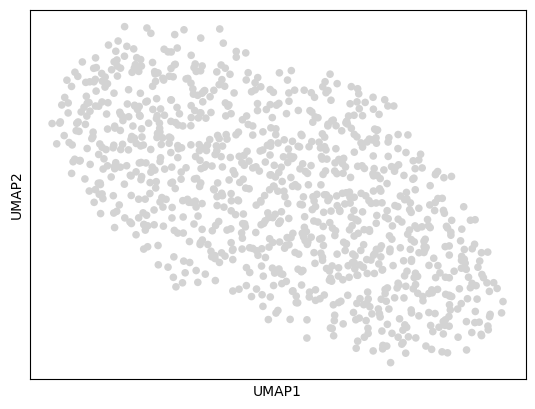

In [19]:
sc.pl.umap(adata_tmp)